In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn import datasets
from sklearn import svm
from sklearn.cross_validation import StratifiedKFold
from sklearn.externals.six.moves import xrange
from sklearn.mixture import GMM

%matplotlib inline

iris = datasets.load_iris()
xtrain = iris.data
ytrain = iris.target


/u/l/o/lokhande/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2699: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


### Parameters

In [3]:
cg = 1;
cgg = 0.5;
lam = 1;
eta = 100;

In [7]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def kernel(A, B):
    return cg*np.exp(-cgg*np.dot(A,B.transpose()))

def innerm(x):
    return np.dot(x[:,None],x[:,None].transpose()) 

In [8]:
# Test dataset creation
xtest = 3*xtrain + 4
np.random.seed(0)
indices = np.random.permutation(xtrain.shape[0])
xtestL = xtest[indices[:50],:]
xtestU = xtest[indices[51:],:]
ytestL = ytrain[indices[:50]]
ytestU = ytrain[indices[51:]]

In [9]:
w = np.ones(xtrain.shape[1], dtype=np.int)
b = np.zeros(xtrain.shape[1], dtype=np.int)
i = 0
err = []
type(err)

list

In [10]:
while i < 1:
    i = i+1

    ynew = ytrain*np.dot(xtrain, w) + np.dot(xtrain,b)
    
    X = np.concatenate((xtrain, xtestL), axis=0)
    Y = np.concatenate((ynew, ytestL), axis=0)
    clf = svm.SVC()
    clf.fit(X, Y)
    err.append(rmse(clf.predict(xtestU), ytestU))

    dim = xtrain.shape[0] 
    Ltr = kernel(xtrain,xtrain)
    Ltr2 = np.linalg.inv(Ltr + lam*np.identity(dim))
    der_yyw = np.dot(ytrain[:,None],ytrain[:,None].transpose()) * np.dot(xtrain,np.dot(innerm(w),xtrain.transpose()))
    der_yyb = np.dot(ytrain[:,None],ytrain[:,None].transpose()) * np.dot(xtrain,np.dot(innerm(b),xtrain.transpose()))

    mat1_w =  -cgg*np.trace(np.dot(np.dot(np.dot(np.dot(Ltr2,Ltr),Ltr2), kernel(ynew[:,None],ynew[:,None])),der_yyw))
    mat1_b =  -cgg*np.trace(np.dot(np.dot(np.dot(np.dot(Ltr2,Ltr),Ltr2), kernel(ynew[:,None],ynew[:,None])),der_yyb))

    w = w - eta*(mat1_w*np.ones(w.shape[0]) + 2*(w-1))
    b = b - eta*(mat1_b*np.ones(b.shape[0]) + 2*(b-1))

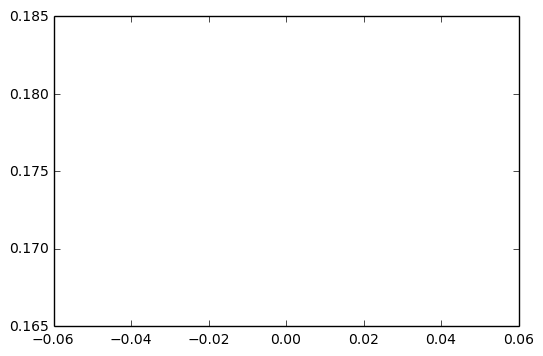

In [11]:
plt.plot(err)
plt.show()

In [12]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)